In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stemmed-data/StemmedData.csv
/kaggle/input/habersampled/undersampled_data.csv


In [2]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate,train_test_split
from sklearn.preprocessing import LabelEncoder
import string
import nltk
from nltk.tokenize import word_tokenize
import snowballstemmer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from snowballstemmer import TurkishStemmer

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


In [3]:
 df=pd.read_csv("/kaggle/input/habersampled/undersampled_data.csv")

In [4]:
import re

def clean_text(text):
    text = text.replace('"', '').replace("'", '')
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = ' '.join(text.split())
    return text

In [5]:
df["haber"]= df["haber"].apply(clean_text)

In [6]:
df

,words,haber,sinif
0,138,gore ekim saldirisi tutuklulardan kaynaklanan ...,Siyaset
1,138,katilimci demokrasi sivil toplumun siyaset kur...,Siyaset
2,135,tarihten ibret alinmadigi takdirde yeni acilar...,Siyaset
3,126,y sozde helallesme yolculuguna cikilan tutarsi...,Siyaset
4,127,hukumeti varligini hikmetini kaybetmistir diyo...,Siyaset
...,...,...,...
280671,132,cevre sehircilik iklim degisikligi bakani mehm...,Çevre
280672,127,iyi ortaya koydu arastirmada cogunlukla ekonom...,Çevre
280673,127,hakkinda uluslararasi ortak basin bildirisini ...,Çevre
280674,136,avza koruma eylem planinda acik sekilde havzad...,Çevre


In [7]:
dff=df.copy()

In [8]:
dff['haber'] = dff['haber'].apply(word_tokenize)

In [9]:
dn=dff.copy()

In [10]:
dn

,words,haber,sinif
0,138,"[gore, ekim, saldirisi, tutuklulardan, kaynakl...",Siyaset
1,138,"[katilimci, demokrasi, sivil, toplumun, siyase...",Siyaset
2,135,"[tarihten, ibret, alinmadigi, takdirde, yeni, ...",Siyaset
3,126,"[y, sozde, helallesme, yolculuguna, cikilan, t...",Siyaset
4,127,"[hukumeti, varligini, hikmetini, kaybetmistir,...",Siyaset
...,...,...,...
280671,132,"[cevre, sehircilik, iklim, degisikligi, bakani...",Çevre
280672,127,"[iyi, ortaya, koydu, arastirmada, cogunlukla, ...",Çevre
280673,127,"[hakkinda, uluslararasi, ortak, basin, bildiri...",Çevre
280674,136,"[avza, koruma, eylem, planinda, acik, sekilde,...",Çevre


# Stemming

In [11]:
stemmer = TurkishStemmer()
dn["haber"] = dn["haber"].apply(lambda x: [stemmer.stemWord(word) for word in x])

In [12]:
dn.to_csv("StemmedData.csv")

In [13]:
dn=pd.read_csv("/kaggle/working/StemmedData.csv")

## Data Split

In [14]:
news_dict={'Magazin':0,'Siyaset':1,'Sağlık':2,'Spor':3,'Kültür-Sanat':4,'Turizm':5,'Finans-Ekonomi':6,'Bilim-Teknoloji':7,'Çevre':8} 
dn["sinif"]=dn["sinif"].map(news_dict)


In [15]:
df["sinif"]=df["sinif"].map(news_dict)

In [16]:
def convert_to_string(s):
    s = s.strip('[]')  
    s = s.replace('...', '')  
    return ' '.join(s.split(',')) 

dn['haber'] = dn['haber'].apply(convert_to_string)

In [17]:
dn['haber'] = dn['haber'].apply(lambda x: ' '.join(x.replace("'", "").split()))

In [18]:
dn

,Unnamed: 0,words,haber,sinif
0,0,138,gore ek saldiris tutuklu kaynaklana tehlike ka...,1
1,1,138,katilimci demokras sivil topl siyaset kurum me...,1
2,2,135,tarih ibret alinmadigi takdir ye aci ye dram y...,1
3,3,126,y sozde helallesme yolculugu cikila tutarsizli...,1
4,4,127,hukumet varligi hikmet kaybetmis diyor ac doya...,1
...,...,...,...,...
280671,280671,132,cevre sehircilik ikl degisikligi bakani mehmet...,8
280672,280672,127,i orta ko arastirma cogunluk ekonomik sosyal p...,8
280673,280673,127,hakk uluslararasi ortak bas bildiri yayimladı ...,8
280674,280674,136,avza kor eyle plan acik sekil havza kati atik ...,8


In [19]:
XX = df["haber"]
yy = df["sinif"]

XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.3, random_state=42)

In [20]:
X = dn["haber"]
y = dn["sinif"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Count Vectorizer

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizerr = CountVectorizer()
count_vectorizerr.fit(XX_train)

CountVectorizer()

In [22]:
XX_train_count = count_vectorizerr.transform(XX_train)
XX_test_count = count_vectorizerr.transform(XX_test)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
count_vectorizer.fit(X_train)

CountVectorizer()

In [24]:
X_train_count = count_vectorizer.transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

## TF-IDF

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tff_idf_vectorizer = TfidfVectorizer()
tff_idf_vectorizer.fit(XX_train)

TfidfVectorizer()

In [26]:
XX_train_tf_idf = tff_idf_vectorizer.transform(XX_train)
XX_test_tf_idf = tff_idf_vectorizer.transform(XX_test)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer()
tf_idf_vectorizer.fit(X_train)

TfidfVectorizer()

In [28]:
X_train_tf_idf = tf_idf_vectorizer.transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

# **Models**

## **XGBoost**

## Count Vectorizer

In [29]:
!pip install xgboost

In [30]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train_count, label=y_train)
dtest = xgb.DMatrix(X_test_count, label=y_test)


params = {
    'objective': 'multi:softmax',  
    'tree_method': 'hist',  
    'device': 'cuda',
    'num_class': 9 
}

num_round = 50
bstCV = xgb.train(params, dtrain, num_round)


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [02:43:53] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


In [31]:

preds = bstCV.predict(dtest)


accuracy = (preds == y_test).mean()
print("XGBoost CV Accuracy:", accuracy)

XGBoost CV Accuracy: 0.8709547165777941


In [32]:
report = classification_report(y_test, preds)
matrix = confusion_matrix(y_test, preds)

print("XGBoost CV Classification Report:")
print(report)

XGBoost CV Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      7653
           1       0.80      0.82      0.81      7567
           2       0.92      0.96      0.94     15350
           3       0.97      0.96      0.97      7666
           4       0.82      0.88      0.85     15253
           5       0.87      0.80      0.83      7653
           6       0.89      0.86      0.87      7807
           7       0.90      0.89      0.89      7591
           8       0.80      0.77      0.78      7663

    accuracy                           0.87     84203
   macro avg       0.87      0.86      0.86     84203
weighted avg       0.87      0.87      0.87     84203



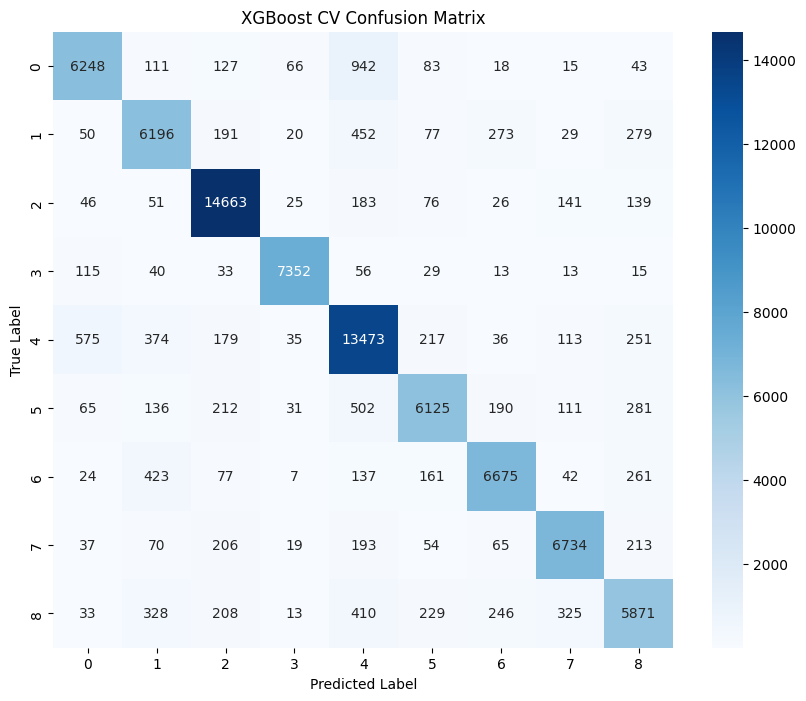

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost CV Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## Unstemmed Data

In [34]:
import xgboost as xgb

ddtrain = xgb.DMatrix(XX_train_count, label=yy_train)
ddtest = xgb.DMatrix(XX_test_count, label=yy_test)


params = {
    'objective': 'multi:softmax',  
    'tree_method': 'hist',  
    'device': 'cuda',
    'num_class': 9 
}

num_round = 50
UnbstCV = xgb.train(params, ddtrain, num_round)

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [02:53:06] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


In [35]:
preds = UnbstCV.predict(ddtest)


accuracy = (preds == yy_test).mean()
print("XGBoost with Unstemmed Data CV Accuracy:", accuracy)

XGBoost with Unstemmed Data CV Accuracy: 0.857249741695664


In [36]:
report = classification_report(yy_test, preds)
matrix = confusion_matrix(yy_test, preds)

print("XGBoost with Unstemmed Data CV Accuracy Classification Report:")
print(report)

XGBoost with Unstemmed Data CV Accuracy Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      7653
           1       0.81      0.79      0.80      7567
           2       0.91      0.95      0.93     15350
           3       0.97      0.95      0.96      7666
           4       0.77      0.88      0.82     15253
           5       0.87      0.77      0.82      7653
           6       0.88      0.84      0.86      7807
           7       0.89      0.88      0.88      7591
           8       0.80      0.74      0.77      7663

    accuracy                           0.86     84203
   macro avg       0.86      0.84      0.85     84203
weighted avg       0.86      0.86      0.86     84203



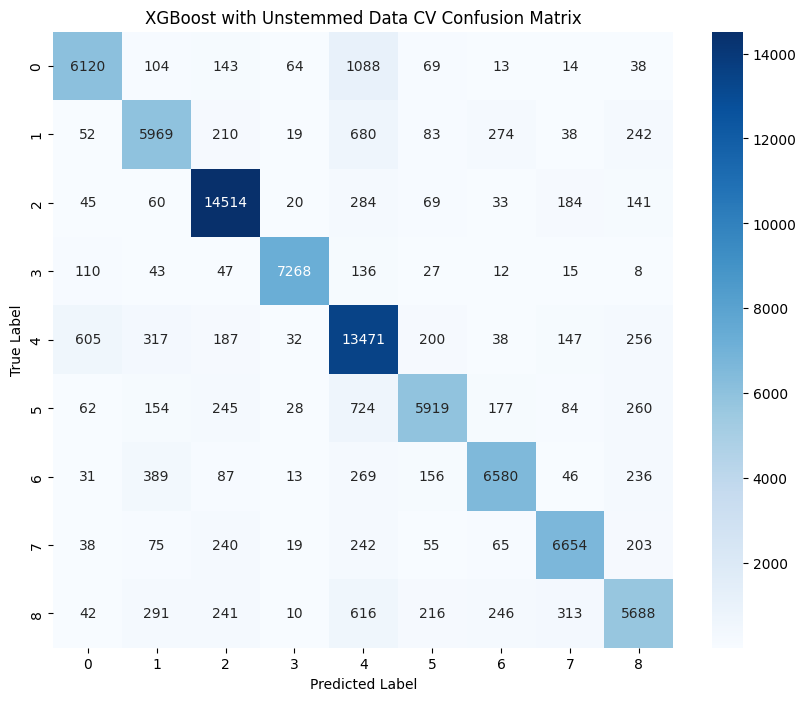

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost with Unstemmed Data CV Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## TF-IDF 

In [38]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train_tf_idf, label=y_train)
dtest = xgb.DMatrix(X_test_tf_idf, label=y_test)

params = {
    'objective': 'multi:softmax',  
    'tree_method': 'hist',  
    'device': 'cuda',
    'num_class': 9 
}

num_round = 50
bstTF = xgb.train(params, dtrain, num_round)

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [03:06:45] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


In [39]:
# Test setinde tahmin yapma
preds = bstTF.predict(dtest)

# Doğruluk oranını hesaplama
accuracy = (preds == y_test).mean()
print("XGBoost TF-IDF Accuracy:", accuracy)

XGBoost TF-IDF Accuracy: 0.8761801836039096


In [40]:
report = classification_report(y_test, preds)
matrix = confusion_matrix(y_test, preds)

print("XGBoost TF-IDF Classification Report:")
print(report)

XGBoost TF-IDF Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      7653
           1       0.81      0.83      0.82      7567
           2       0.92      0.96      0.94     15350
           3       0.97      0.96      0.97      7666
           4       0.83      0.89      0.86     15253
           5       0.87      0.81      0.84      7653
           6       0.89      0.86      0.87      7807
           7       0.91      0.90      0.91      7591
           8       0.81      0.77      0.79      7663

    accuracy                           0.88     84203
   macro avg       0.88      0.87      0.87     84203
weighted avg       0.88      0.88      0.88     84203



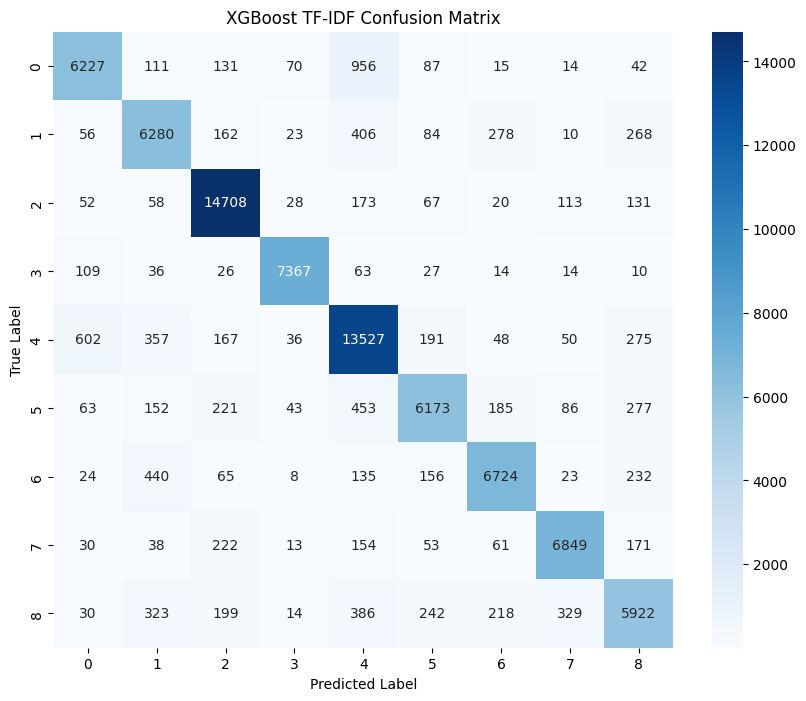

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost TF-IDF Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Unstemmed Data

In [42]:
import xgboost as xgb

ddtrain = xgb.DMatrix(XX_train_tf_idf, label=yy_train)
ddtest = xgb.DMatrix(XX_test_tf_idf, label=yy_test)

params = {
    'objective': 'multi:softmax',  
    'tree_method': 'hist',  
    'device': 'cuda',
    'num_class': 9 
}

num_round = 30
bstTFF = xgb.train(params, ddtrain, num_round)

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [03:37:08] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


In [43]:
preds = bstTFF.predict(ddtest)
accuracy = (preds == y_test).mean()
print("Unstemmed Data XGBoost TF-IDF Accuracy:", accuracy)

Unstemmed Data XGBoost TF-IDF Accuracy: 0.8457062099925181


In [44]:
report = classification_report(yy_test, preds)
matrix = confusion_matrix(yy_test, preds)

print("Unstemmed Data XGBoost TF-IDF Classification Report:")
print(report)

Unstemmed Data XGBoost TF-IDF Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.81      7653
           1       0.80      0.78      0.79      7567
           2       0.90      0.94      0.92     15350
           3       0.97      0.93      0.95      7666
           4       0.74      0.88      0.80     15253
           5       0.87      0.75      0.81      7653
           6       0.88      0.83      0.86      7807
           7       0.90      0.89      0.89      7591
           8       0.80      0.71      0.75      7663

    accuracy                           0.85     84203
   macro avg       0.85      0.83      0.84     84203
weighted avg       0.85      0.85      0.85     84203



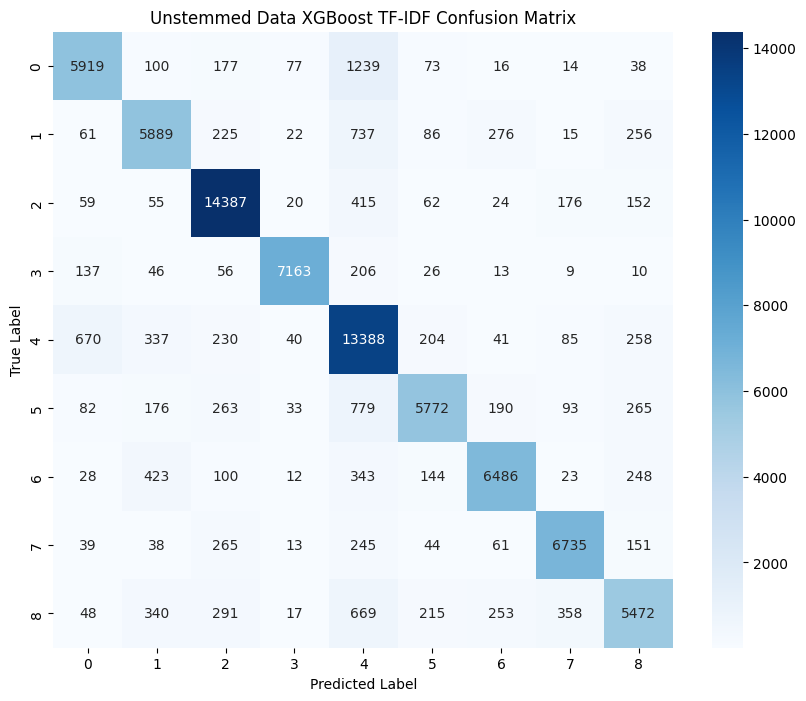

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Unstemmed Data XGBoost TF-IDF Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **BERT**

In [46]:
!pip install transformers
!pip install torch

In [47]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split
import pandas as pd

train_texts, test_texts, train_labels, test_labels = train_test_split(dn['haber'], dn['sinif'], test_size=0.3, random_state=42)

# Tokenizer
tokenizer = BertTokenizer.from_pretrained('dbmdz/bert-base-turkish-cased')


# Tokenizing dat
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=1500, return_tensors='pt')
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=1500, return_tensors='pt')

# Verify that all encoded inputs are of the same length
assert len(train_encodings['input_ids']) == len(train_encodings['attention_mask']) == len(train_labels), "Mismatch in train dataset lengths"
assert len(test_encodings['input_ids']) == len(test_encodings['attention_mask']) == len(test_labels), "Mismatch in test dataset lengths"

# Convert labels to tensors
train_labels = torch.tensor(train_labels.values if isinstance(train_labels, pd.Series) else train_labels)
test_labels = torch.tensor(test_labels.values if isinstance(test_labels, pd.Series) else test_labels)

# Create TensorDatasets
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], train_labels)
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], test_labels)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)



tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/251k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

In [48]:
BertModel = BertForSequenceClassification.from_pretrained('dbmdz/bert-base-turkish-cased', num_labels=9)

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dbmdz/bert-base-turkish-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [49]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
BertModel.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [50]:
from transformers import AdamW
import torch.nn as nn
optimizer = AdamW(BertModel.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

num_epochs = 3
patience = 3
best_val_loss = float('inf')
patience_counter = 0

for epoch in range(num_epochs):
    BertModel.train()
    running_loss = 0.0
    for i, batch in enumerate(train_loader):
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = BertModel(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if (i + 1) % 1000 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}")

    avg_train_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch + 1}/{num_epochs}] Average Training Loss: {avg_train_loss:.4f}")


/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


RuntimeError: The expanded size of the tensor (1500) must match the existing size (512) at non-singleton dimension 1.  Target sizes: [64, 1500].  Tensor sizes: [1, 512]

In [ ]:
all_labels = []
all_predictions = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        outputs = BertModel(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)
        
        # Gerçek etiketleri ve tahminleri listelere ekle
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predictions.cpu().numpy())

In [ ]:
report = classification_report(all_labels, all_predictions)
cm = confusion_matrix(all_labels, all_predictions)

print("Classification Report:")
print(report)

In [ ]:
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel("Tahmin Edilen Etiketler")
    plt.ylabel("Gerçek Etiketler")
    plt.title("Karışıklık Matrisi")
    plt.show()
classes = [str(i) for i in range(len(cm))]

plot_confusion_matrix(cm, classes)

In [ ]:
torch.save(BertModel.state_dict(), 'BertModel.bst')
torch.save(BertModel, "bertModel.pth")


In [ ]:
bstTF.save_model('xgb_model.json')

In [ ]:
import zipfile
import os

def zip_files(directory, zip_filename):
    # Belirtilen dizindeki tüm dosyaları zip dosyasına ekleyin
    with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(directory):
            for file in files:
                zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), os.path.join(directory, '..')))

# Zip dosyası oluşturmak için dizin ve zip dosya adını belirtin
directory_to_zip = "/kaggle/working/"
zip_filename = "models.zip"
zip_files(directory_to_zip, zip_filename)


# 